# Project Objective

The primary objective of this project is to develop a machine learning model that can predict whether an individual's income exceeds $50,000 per year based on demographic and socio-economic features. This prediction can have valuable applications, such as targeting resources and aid programs more effectively.

            ## Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

            ## Loading the Dataset

In [2]:
df=pd.read_csv('census_income.csv')

In [3]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

The Dataset contains 32650 rows and 15 columns

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The Dataset doesnt contain Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The Dataset is Mix of Int and Object Data

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

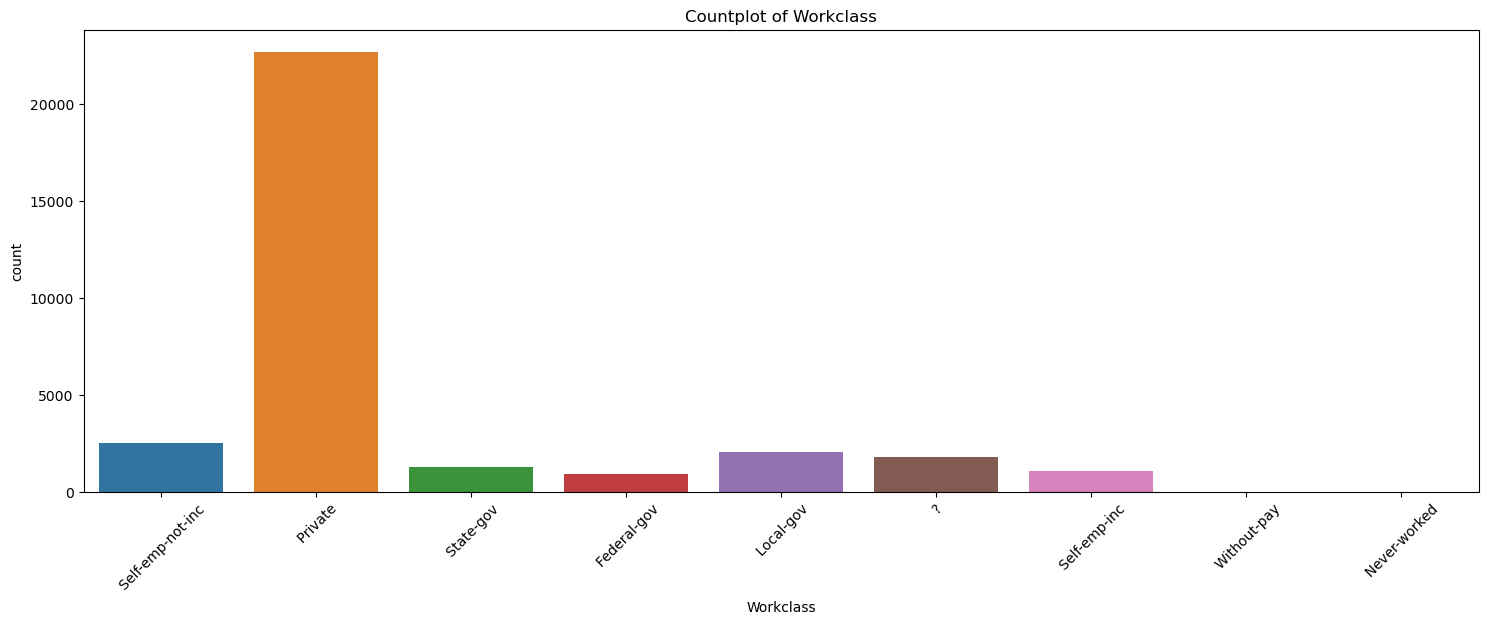

In [9]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x="Workclass")
plt.xticks(rotation=45)
plt.title("Countplot of Workclass")
plt.show()

    The Maximum persons in Dataset belong to Private Workclass

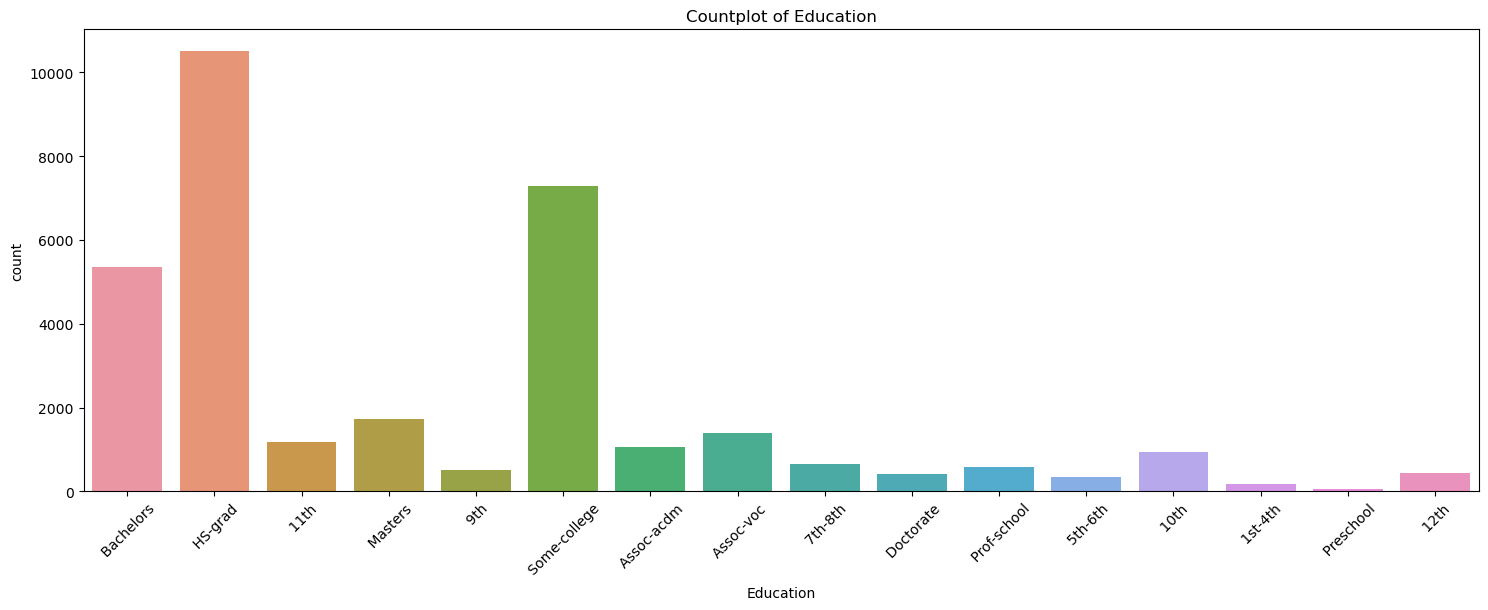

In [10]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x="Education")
plt.xticks(rotation=45)
plt.title("Countplot of Education")
plt.show()

    It can be seen that HS Grad, Bachleors and Some-college contribute Maximum in Cesus Income

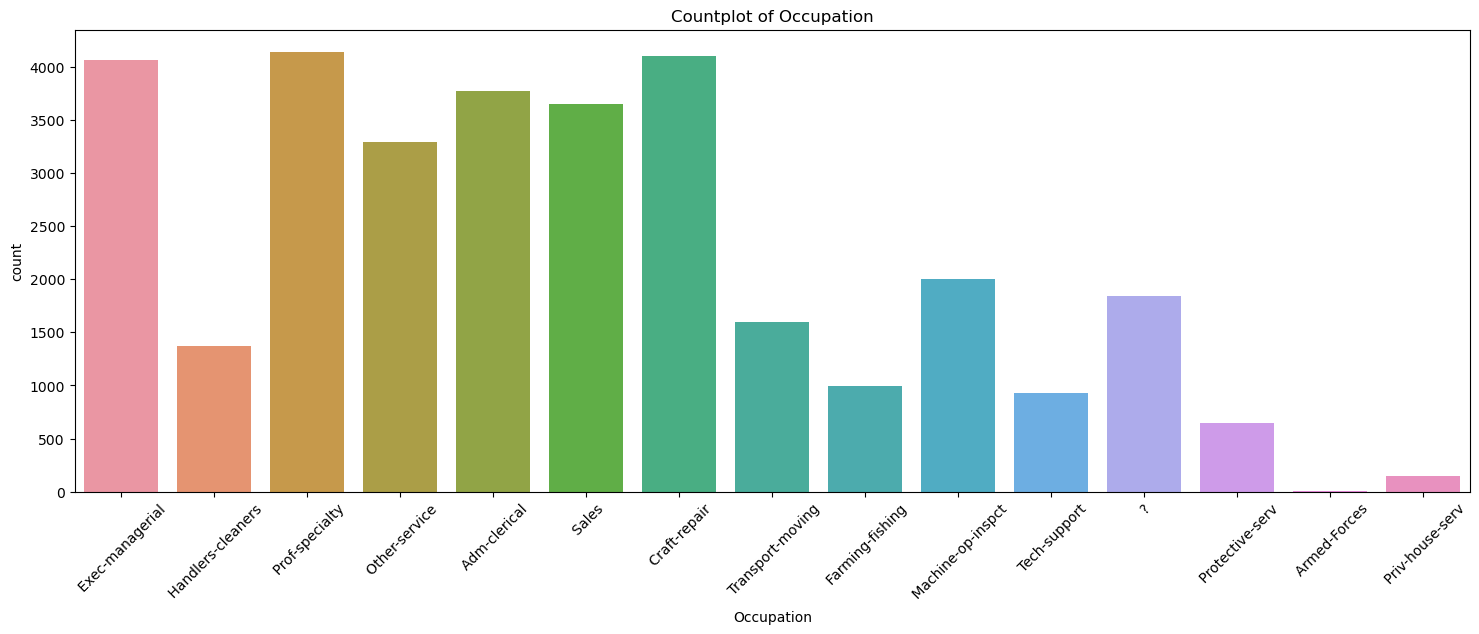

In [11]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x="Occupation")
plt.xticks(rotation=45)
plt.title("Countplot of Occupation")
plt.show()

            Majorly 5 Occupations contribute in the Census Income

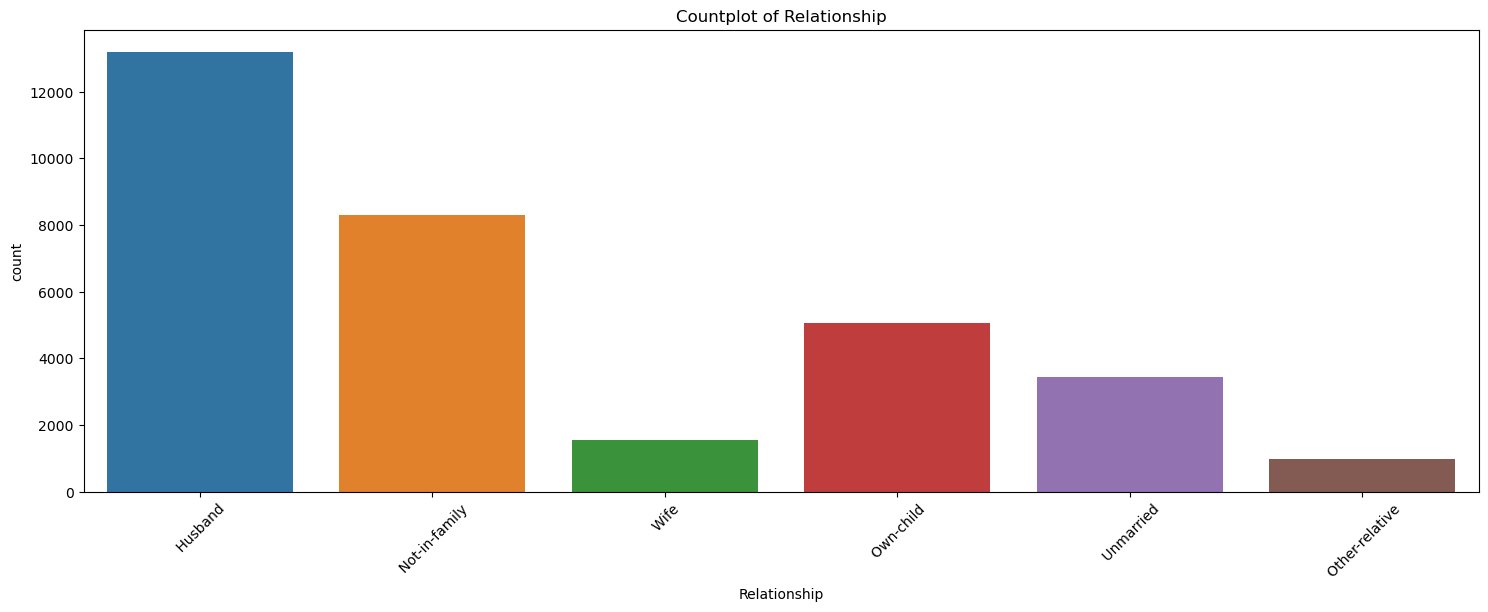

In [12]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x="Relationship")
plt.xticks(rotation=45)
plt.title("Countplot of Relationship")
plt.show()

                Major Contributers are Husband and Not in Family

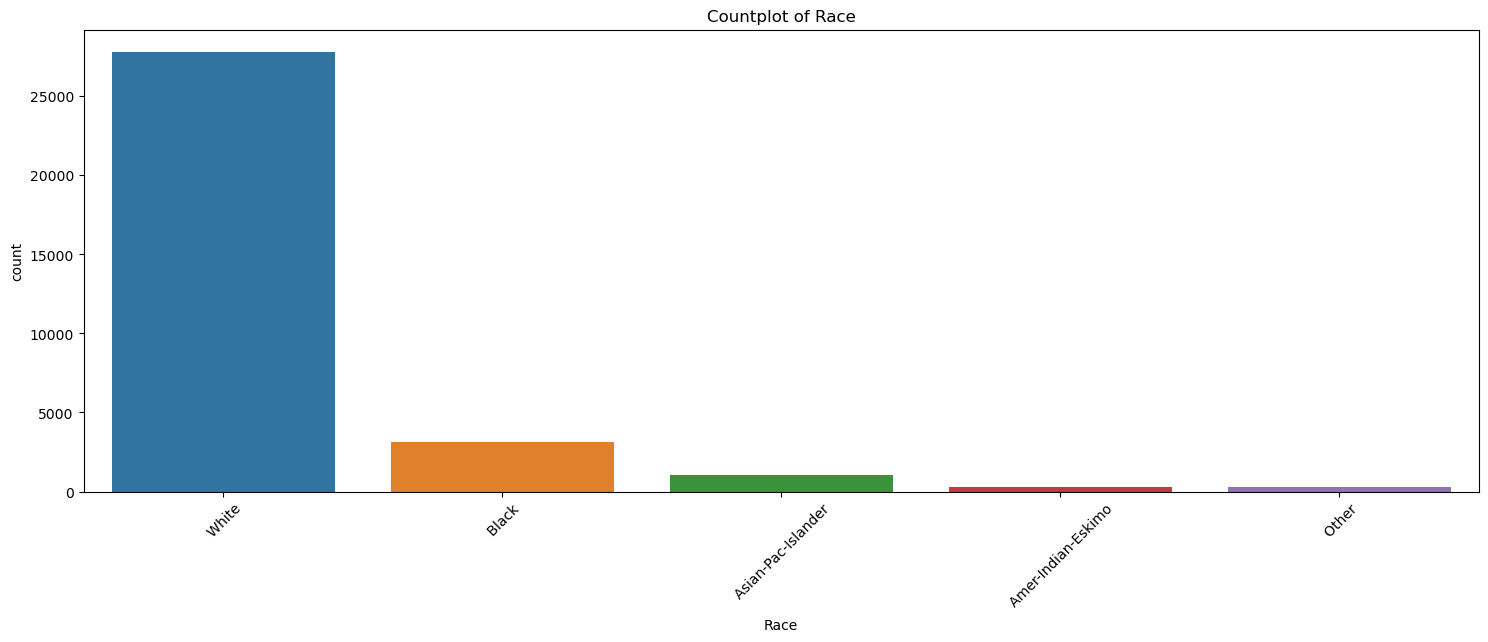

In [13]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x="Race")
plt.xticks(rotation=45)
plt.title("Countplot of Race")
plt.show()

                        Whites are the Major Contributors

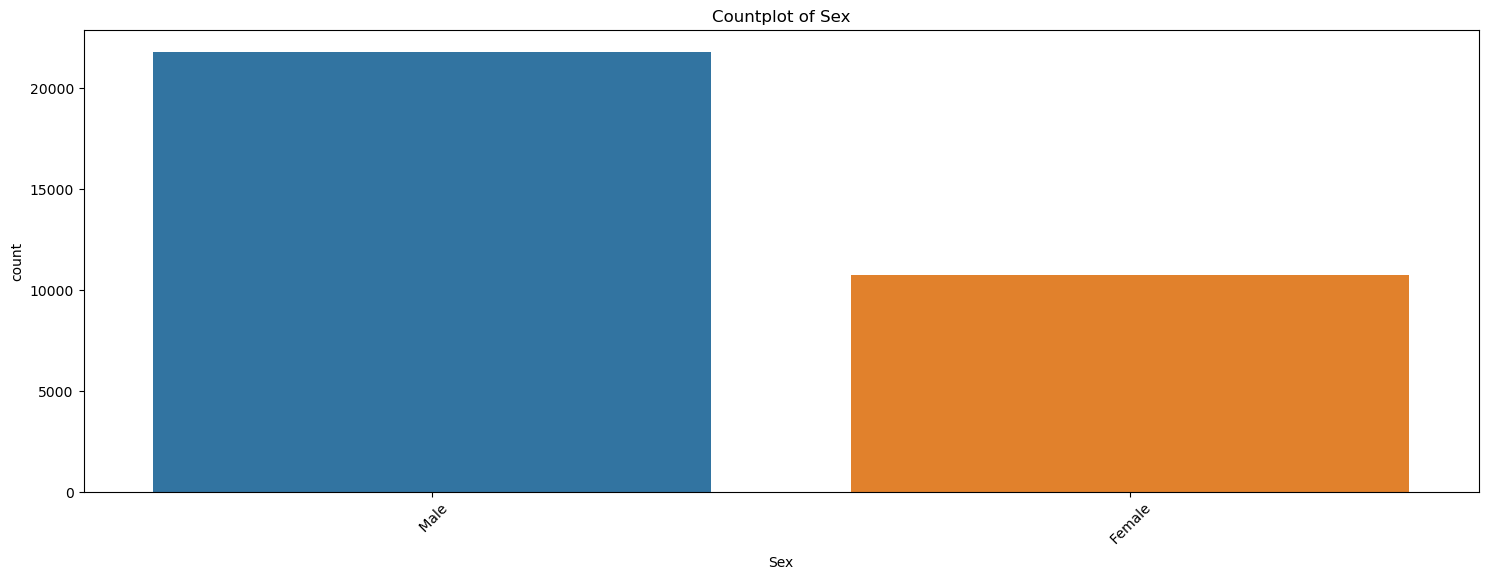

In [14]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x="Sex")
plt.xticks(rotation=45)
plt.title("Countplot of Sex")
plt.show()

                        Major Contributions is from Males

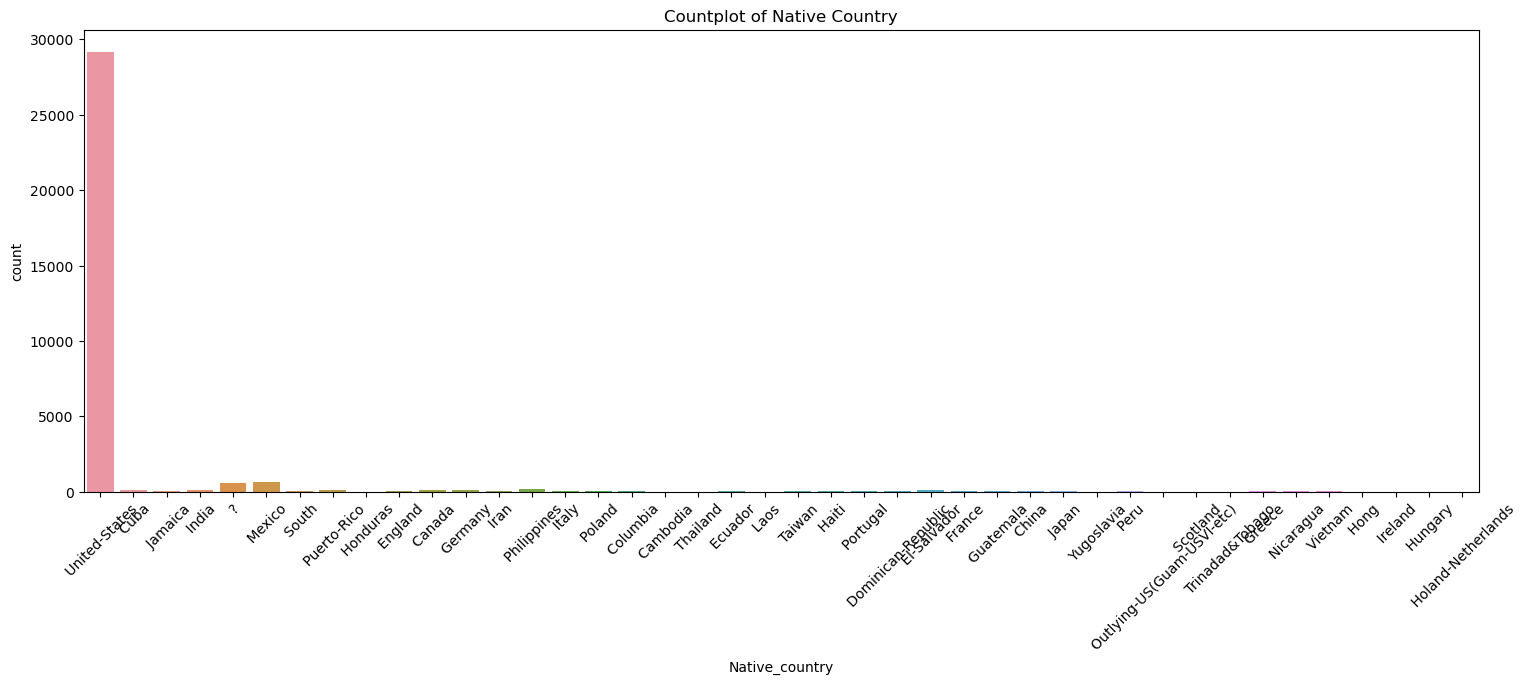

In [15]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x="Native_country")
plt.xticks(rotation=45)
plt.title("Countplot of Native Country")
plt.show()

                        Major Contributor is United States

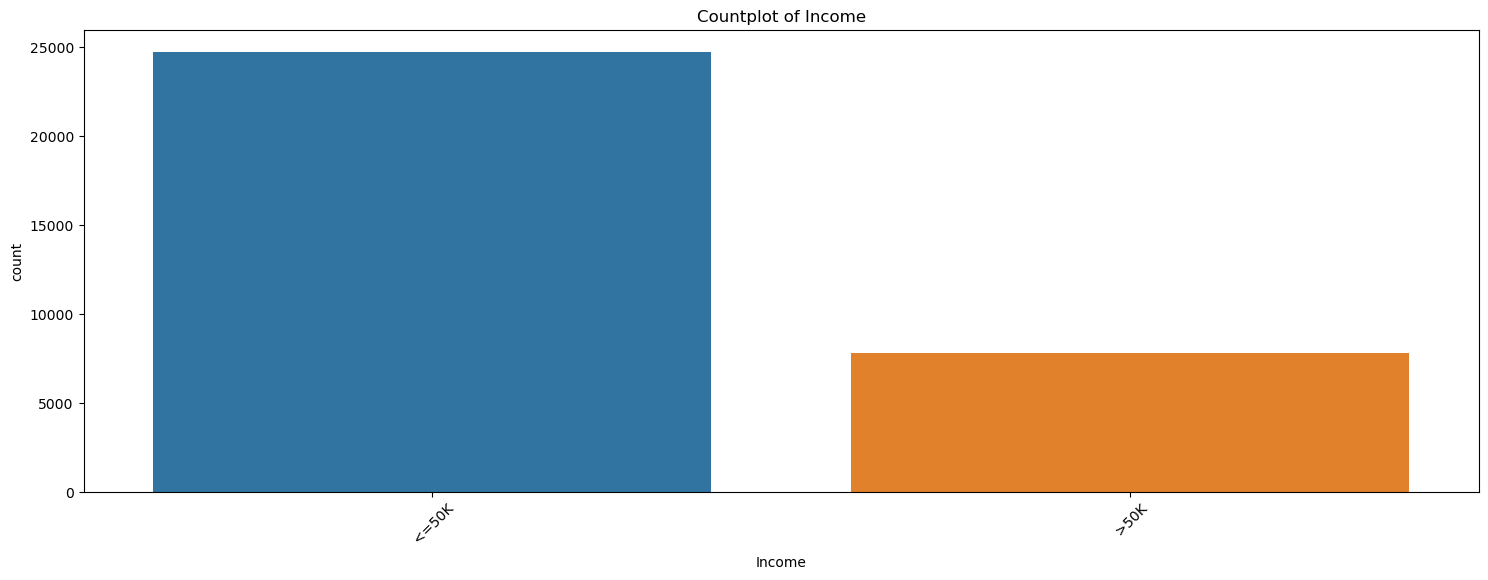

In [16]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x="Income")
plt.xticks(rotation=45)
plt.title("Countplot of Income")
plt.show()

            The Data in Income seems to be imbalanced and may need Balancing 

                            ## Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
list=['Workclass','Education','Marital_status','Occupation','Relationship',
     'Race','Sex','Native_country','Income']
for i in list:
    df[i]=le.fit_transform(df[i])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


                        Label Encoding is Successfull!

## Descriptive Analysis

In [20]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


                    Dataset will require to be addressed for skewness

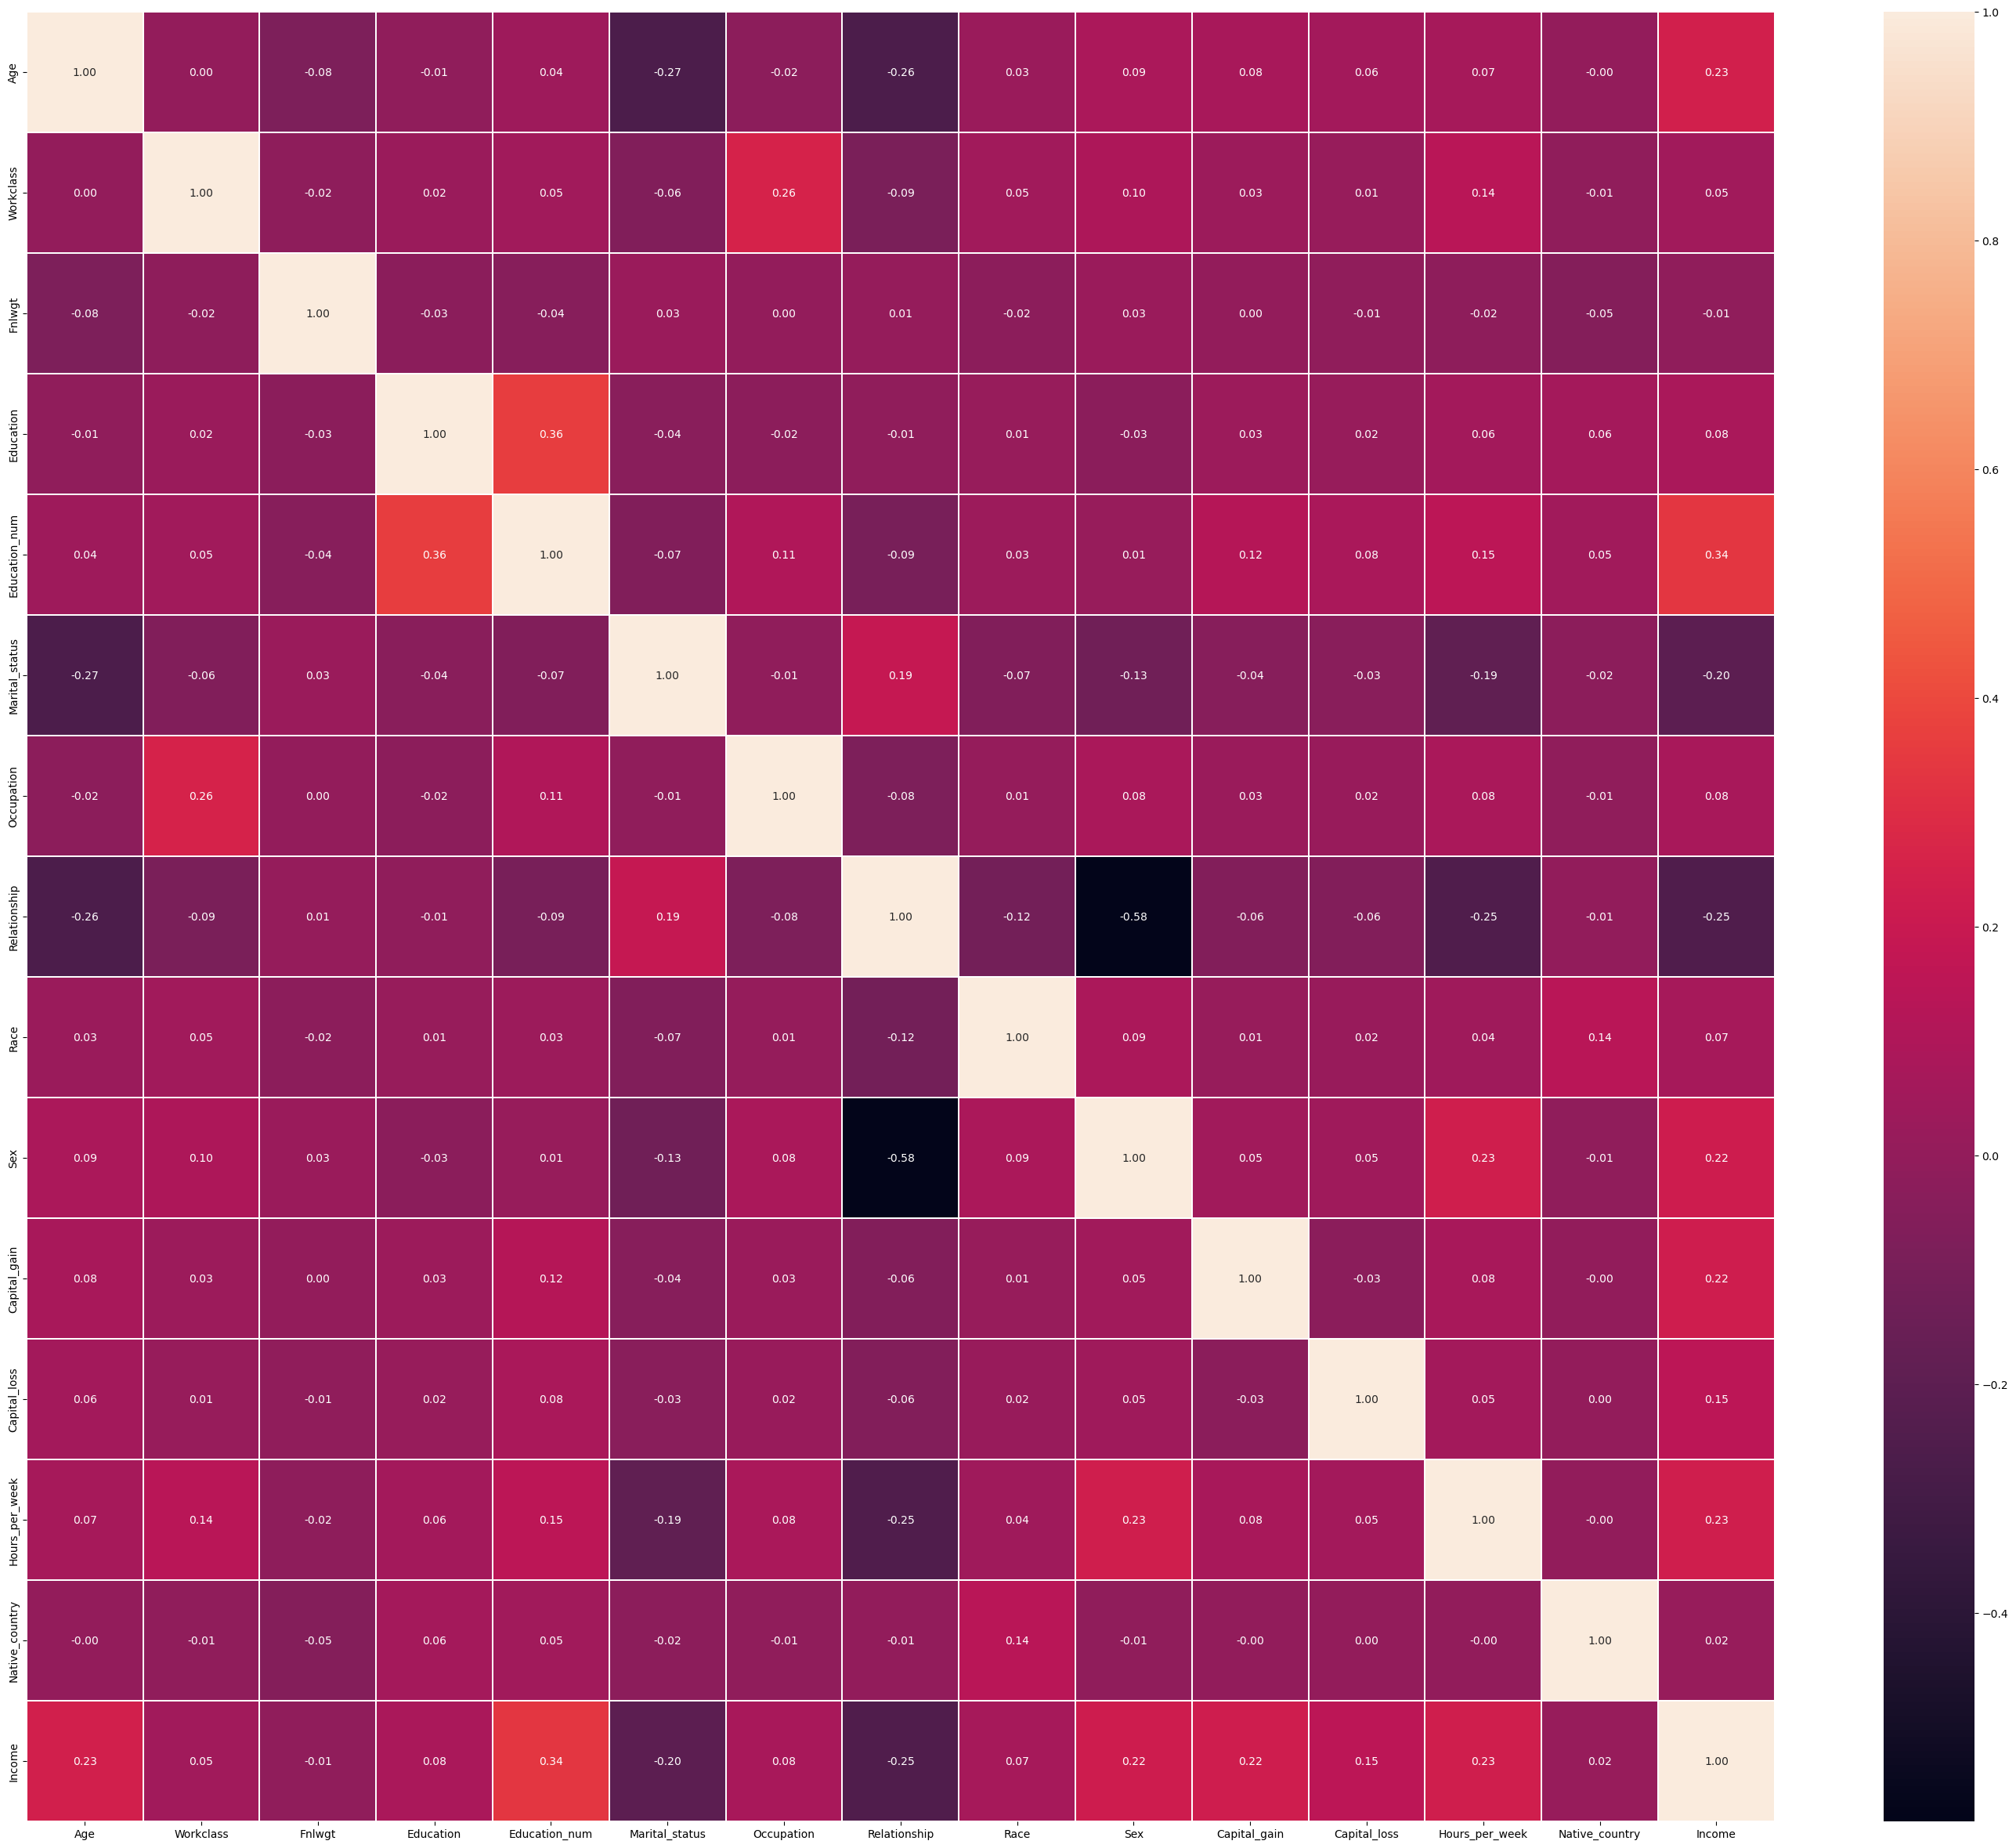

In [21]:
plt.figure(figsize=(36,30))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt='0.2f')
plt.show()

                    There is no issue of Multicollinearity

In [22]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


In [23]:
df.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

            The Fnlwgt has the least corr with target Income and can be dropeed

In [24]:
df.drop(['Fnlwgt'],axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Education       32560 non-null  int32
 3   Education_num   32560 non-null  int64
 4   Marital_status  32560 non-null  int32
 5   Occupation      32560 non-null  int32
 6   Relationship    32560 non-null  int32
 7   Race            32560 non-null  int32
 8   Sex             32560 non-null  int32
 9   Capital_gain    32560 non-null  int64
 10  Capital_loss    32560 non-null  int64
 11  Hours_per_week  32560 non-null  int64
 12  Native_country  32560 non-null  int32
 13  Income          32560 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.4 MB


                                Drop Sucessfull

## Bivariate Analysis

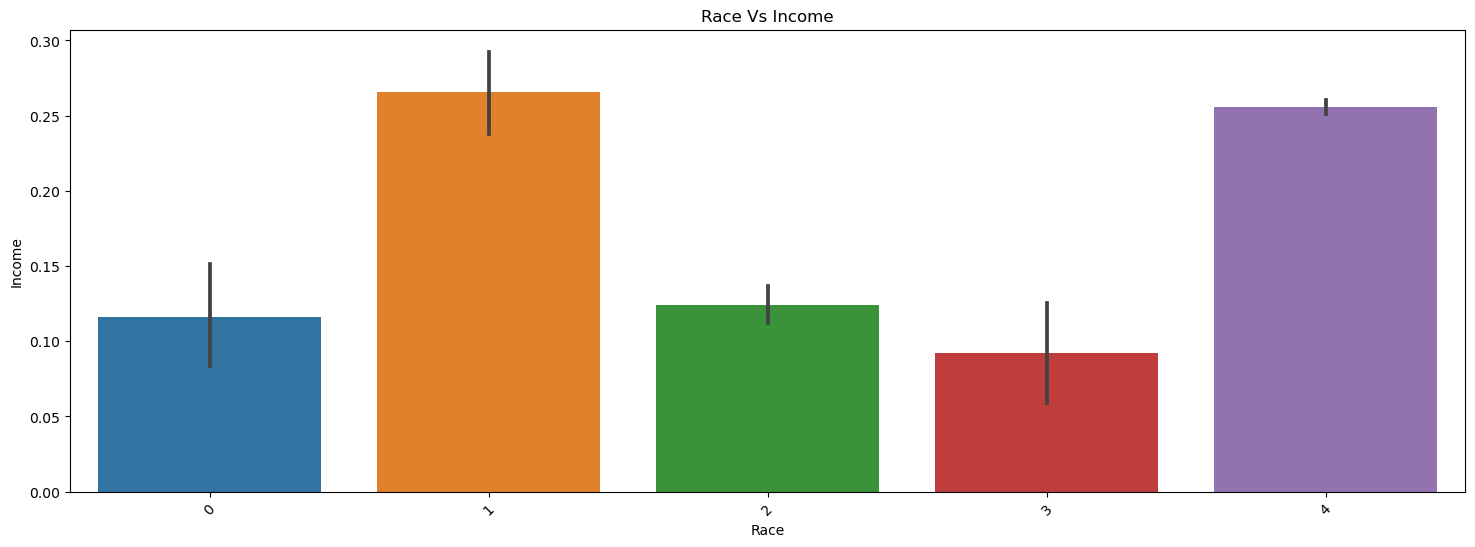

In [26]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="Race",y="Income")
plt.xticks(rotation=45)
plt.title("Race Vs Income")
plt.show()

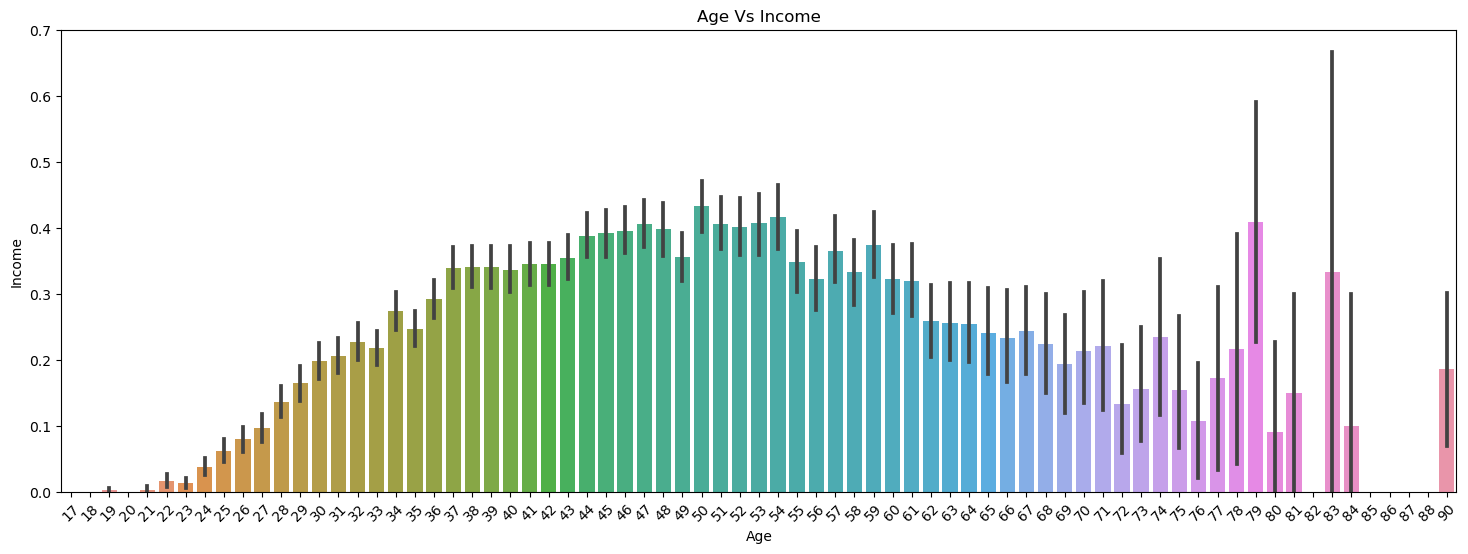

In [27]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="Age",y="Income")
plt.xticks(rotation=45)
plt.title("Age Vs Income")
plt.show()

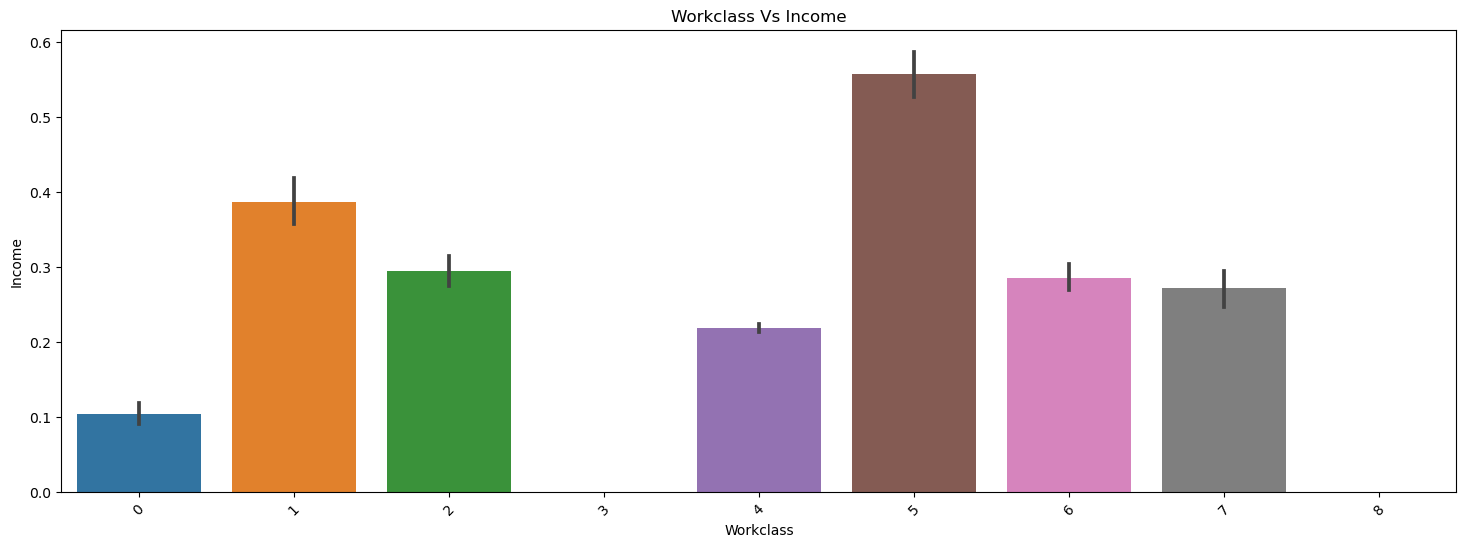

In [28]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="Workclass",y="Income")
plt.xticks(rotation=45)
plt.title("Workclass Vs Income")
plt.show()

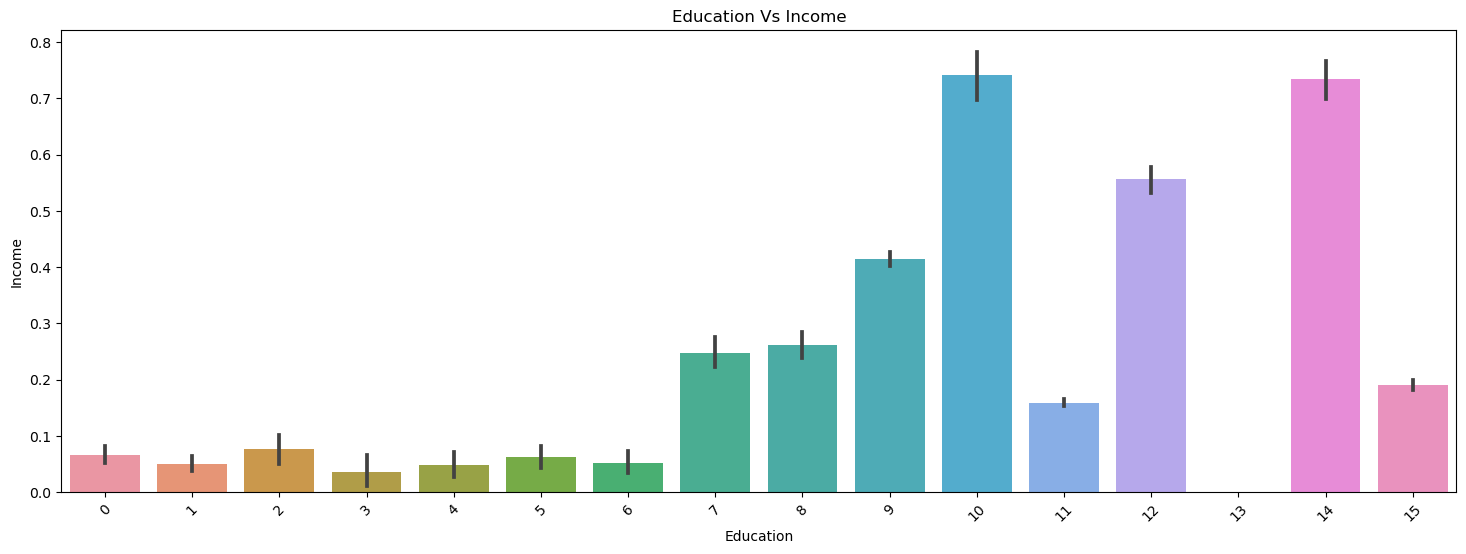

In [29]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="Education",y="Income")
plt.xticks(rotation=45)
plt.title("Education Vs Income")
plt.show()

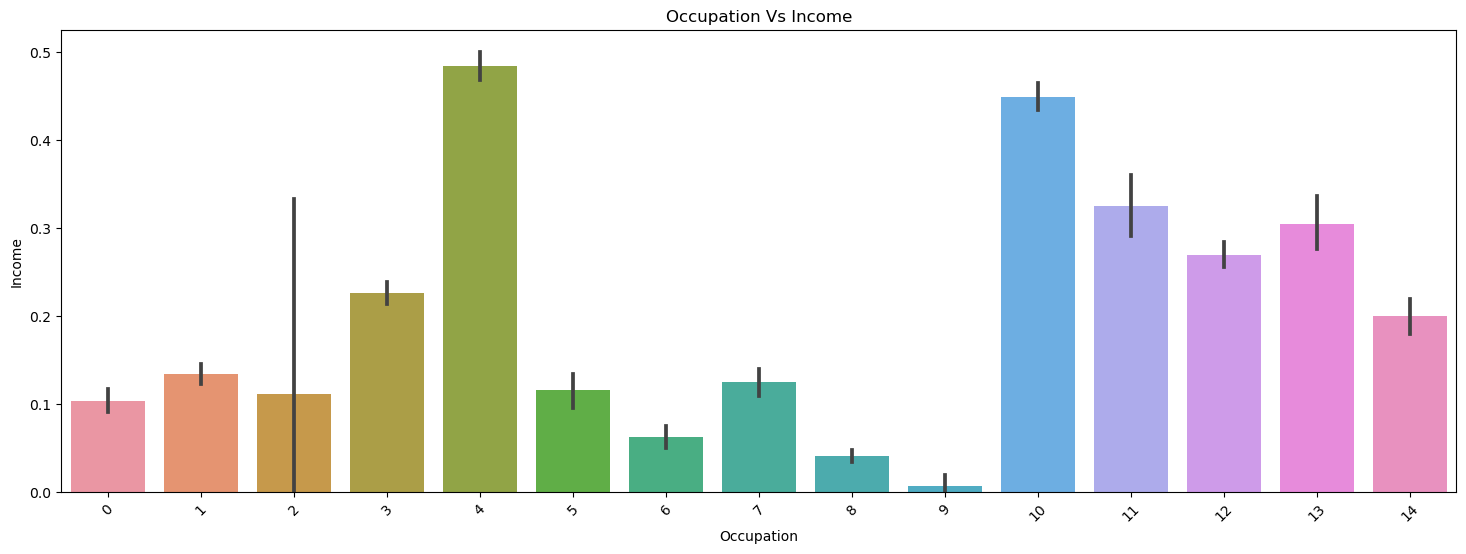

In [30]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="Occupation",y="Income")
plt.xticks(rotation=45)
plt.title("Occupation Vs Income")
plt.show()

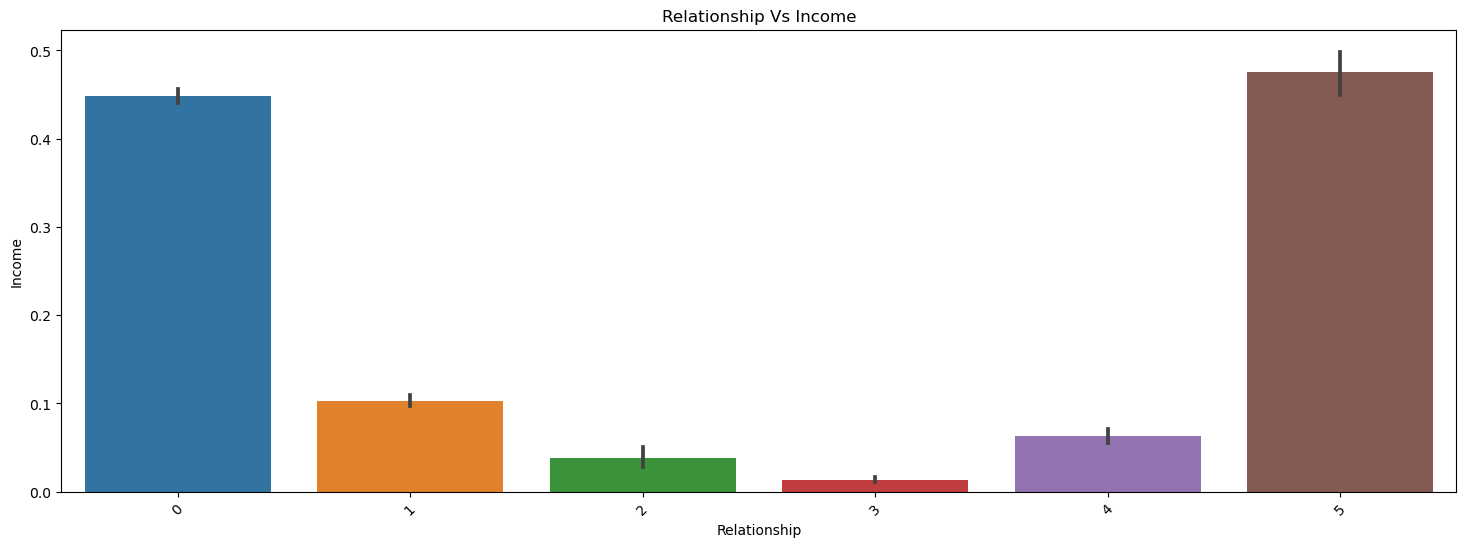

In [31]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="Relationship",y="Income")
plt.xticks(rotation=45)
plt.title("Relationship Vs Income")
plt.show()

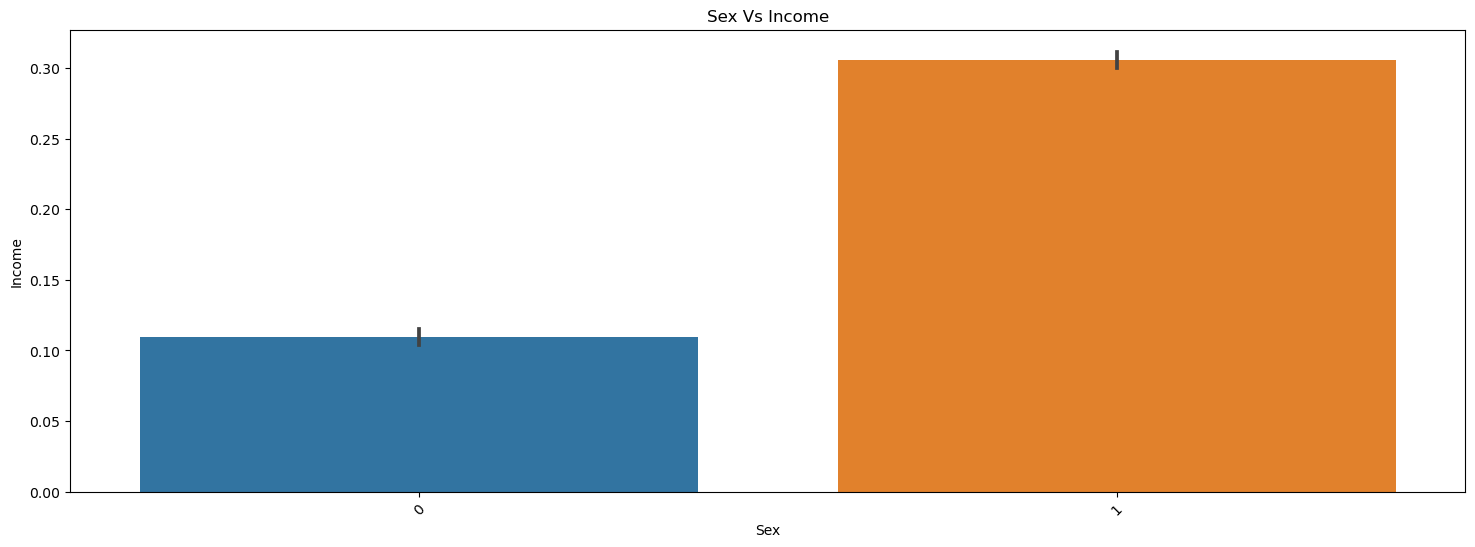

In [32]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="Sex",y="Income")
plt.xticks(rotation=45)
plt.title("Sex Vs Income")
plt.show()

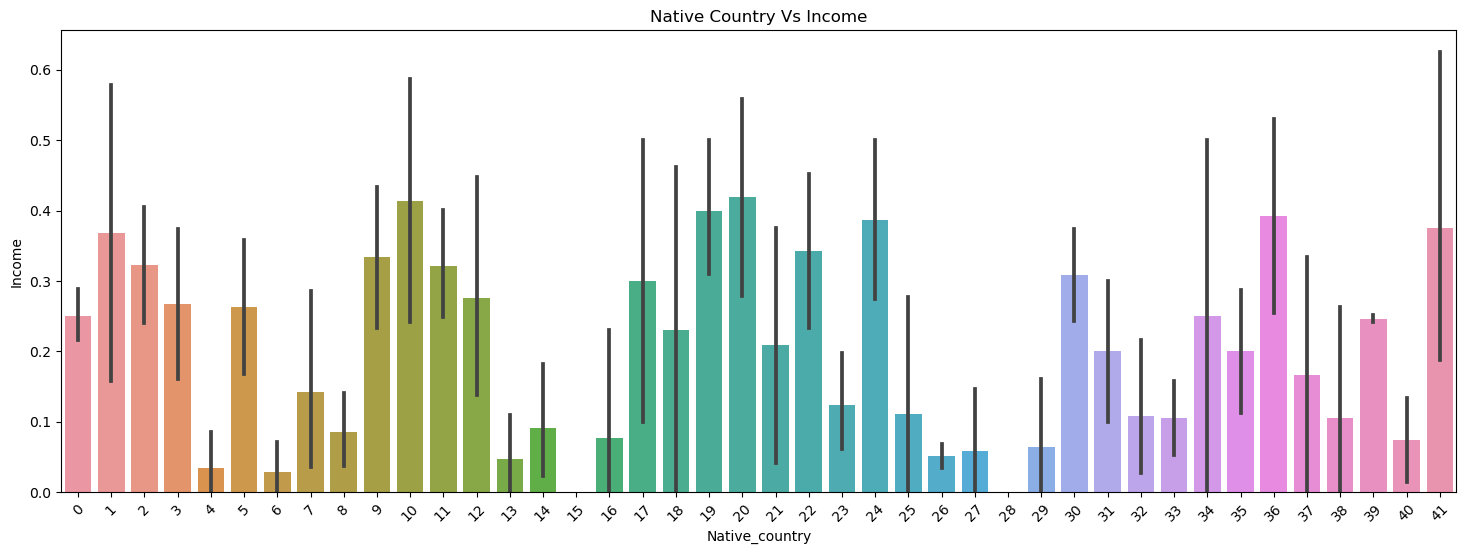

In [33]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="Native_country",y="Income")
plt.xticks(rotation=45)
plt.title("Native Country Vs Income")
plt.show()

## Univariate Analysis

<Axes: xlabel='Age', ylabel='Density'>

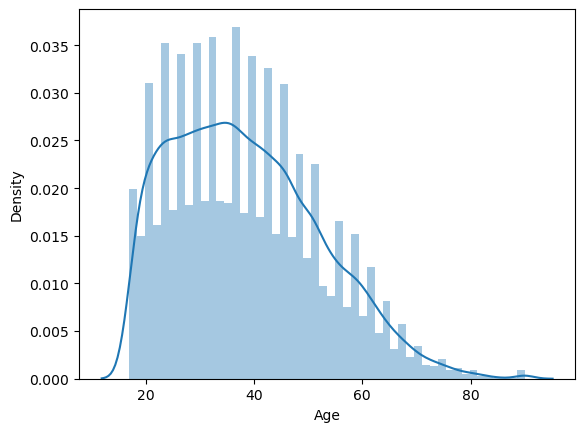

In [34]:
sns.distplot(df['Age'])

<Axes: xlabel='Education_num', ylabel='Density'>

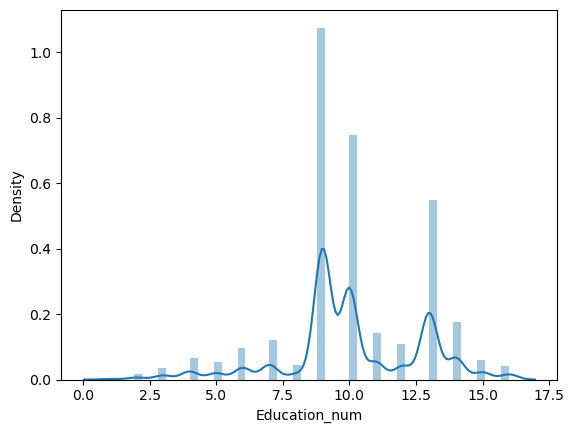

In [35]:
sns.distplot(df['Education_num'])

<Axes: xlabel='Capital_gain', ylabel='Density'>

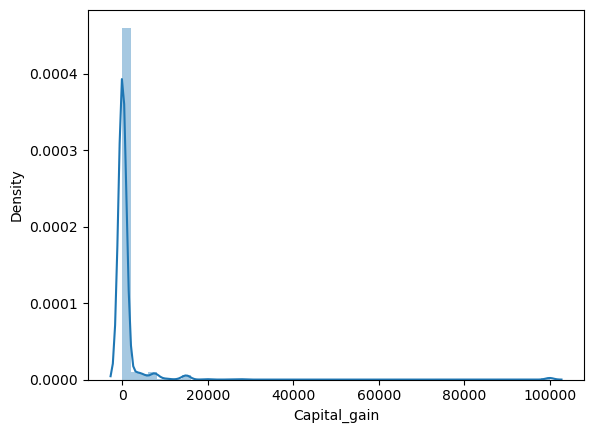

In [36]:
sns.distplot(df['Capital_gain'])

<Axes: xlabel='Capital_loss', ylabel='Density'>

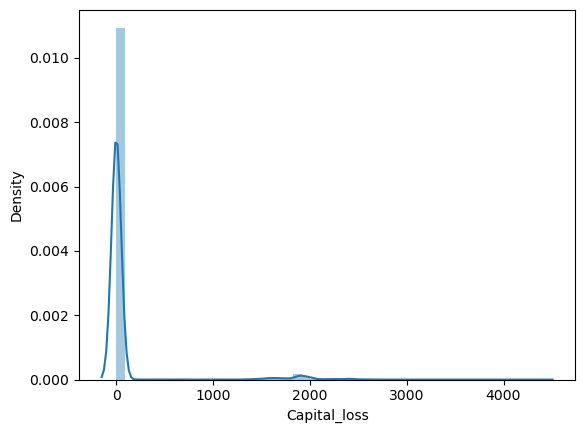

In [37]:
sns.distplot(df['Capital_loss'])

<Axes: xlabel='Hours_per_week', ylabel='Density'>

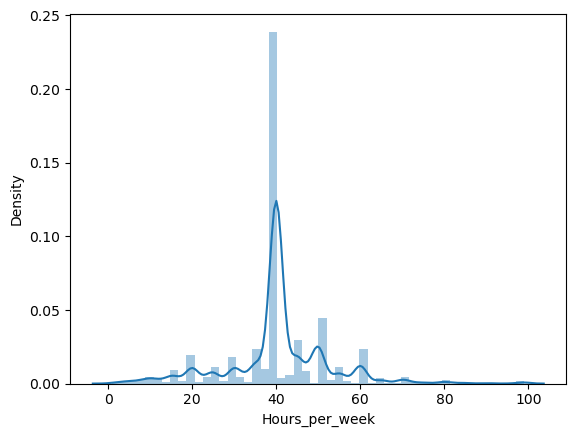

In [38]:
sns.distplot(df['Hours_per_week'])

Age                  Axes(0.125,0.653529;0.133621x0.226471)
Workclass         Axes(0.285345,0.653529;0.133621x0.226471)
Education          Axes(0.44569,0.653529;0.133621x0.226471)
Education_num     Axes(0.606034,0.653529;0.133621x0.226471)
Marital_status    Axes(0.766379,0.653529;0.133621x0.226471)
Occupation           Axes(0.125,0.381765;0.133621x0.226471)
Relationship      Axes(0.285345,0.381765;0.133621x0.226471)
Race               Axes(0.44569,0.381765;0.133621x0.226471)
Sex               Axes(0.606034,0.381765;0.133621x0.226471)
Capital_gain      Axes(0.766379,0.381765;0.133621x0.226471)
Capital_loss             Axes(0.125,0.11;0.133621x0.226471)
Hours_per_week        Axes(0.285345,0.11;0.133621x0.226471)
Native_country         Axes(0.44569,0.11;0.133621x0.226471)
Income                Axes(0.606034,0.11;0.133621x0.226471)
dtype: object

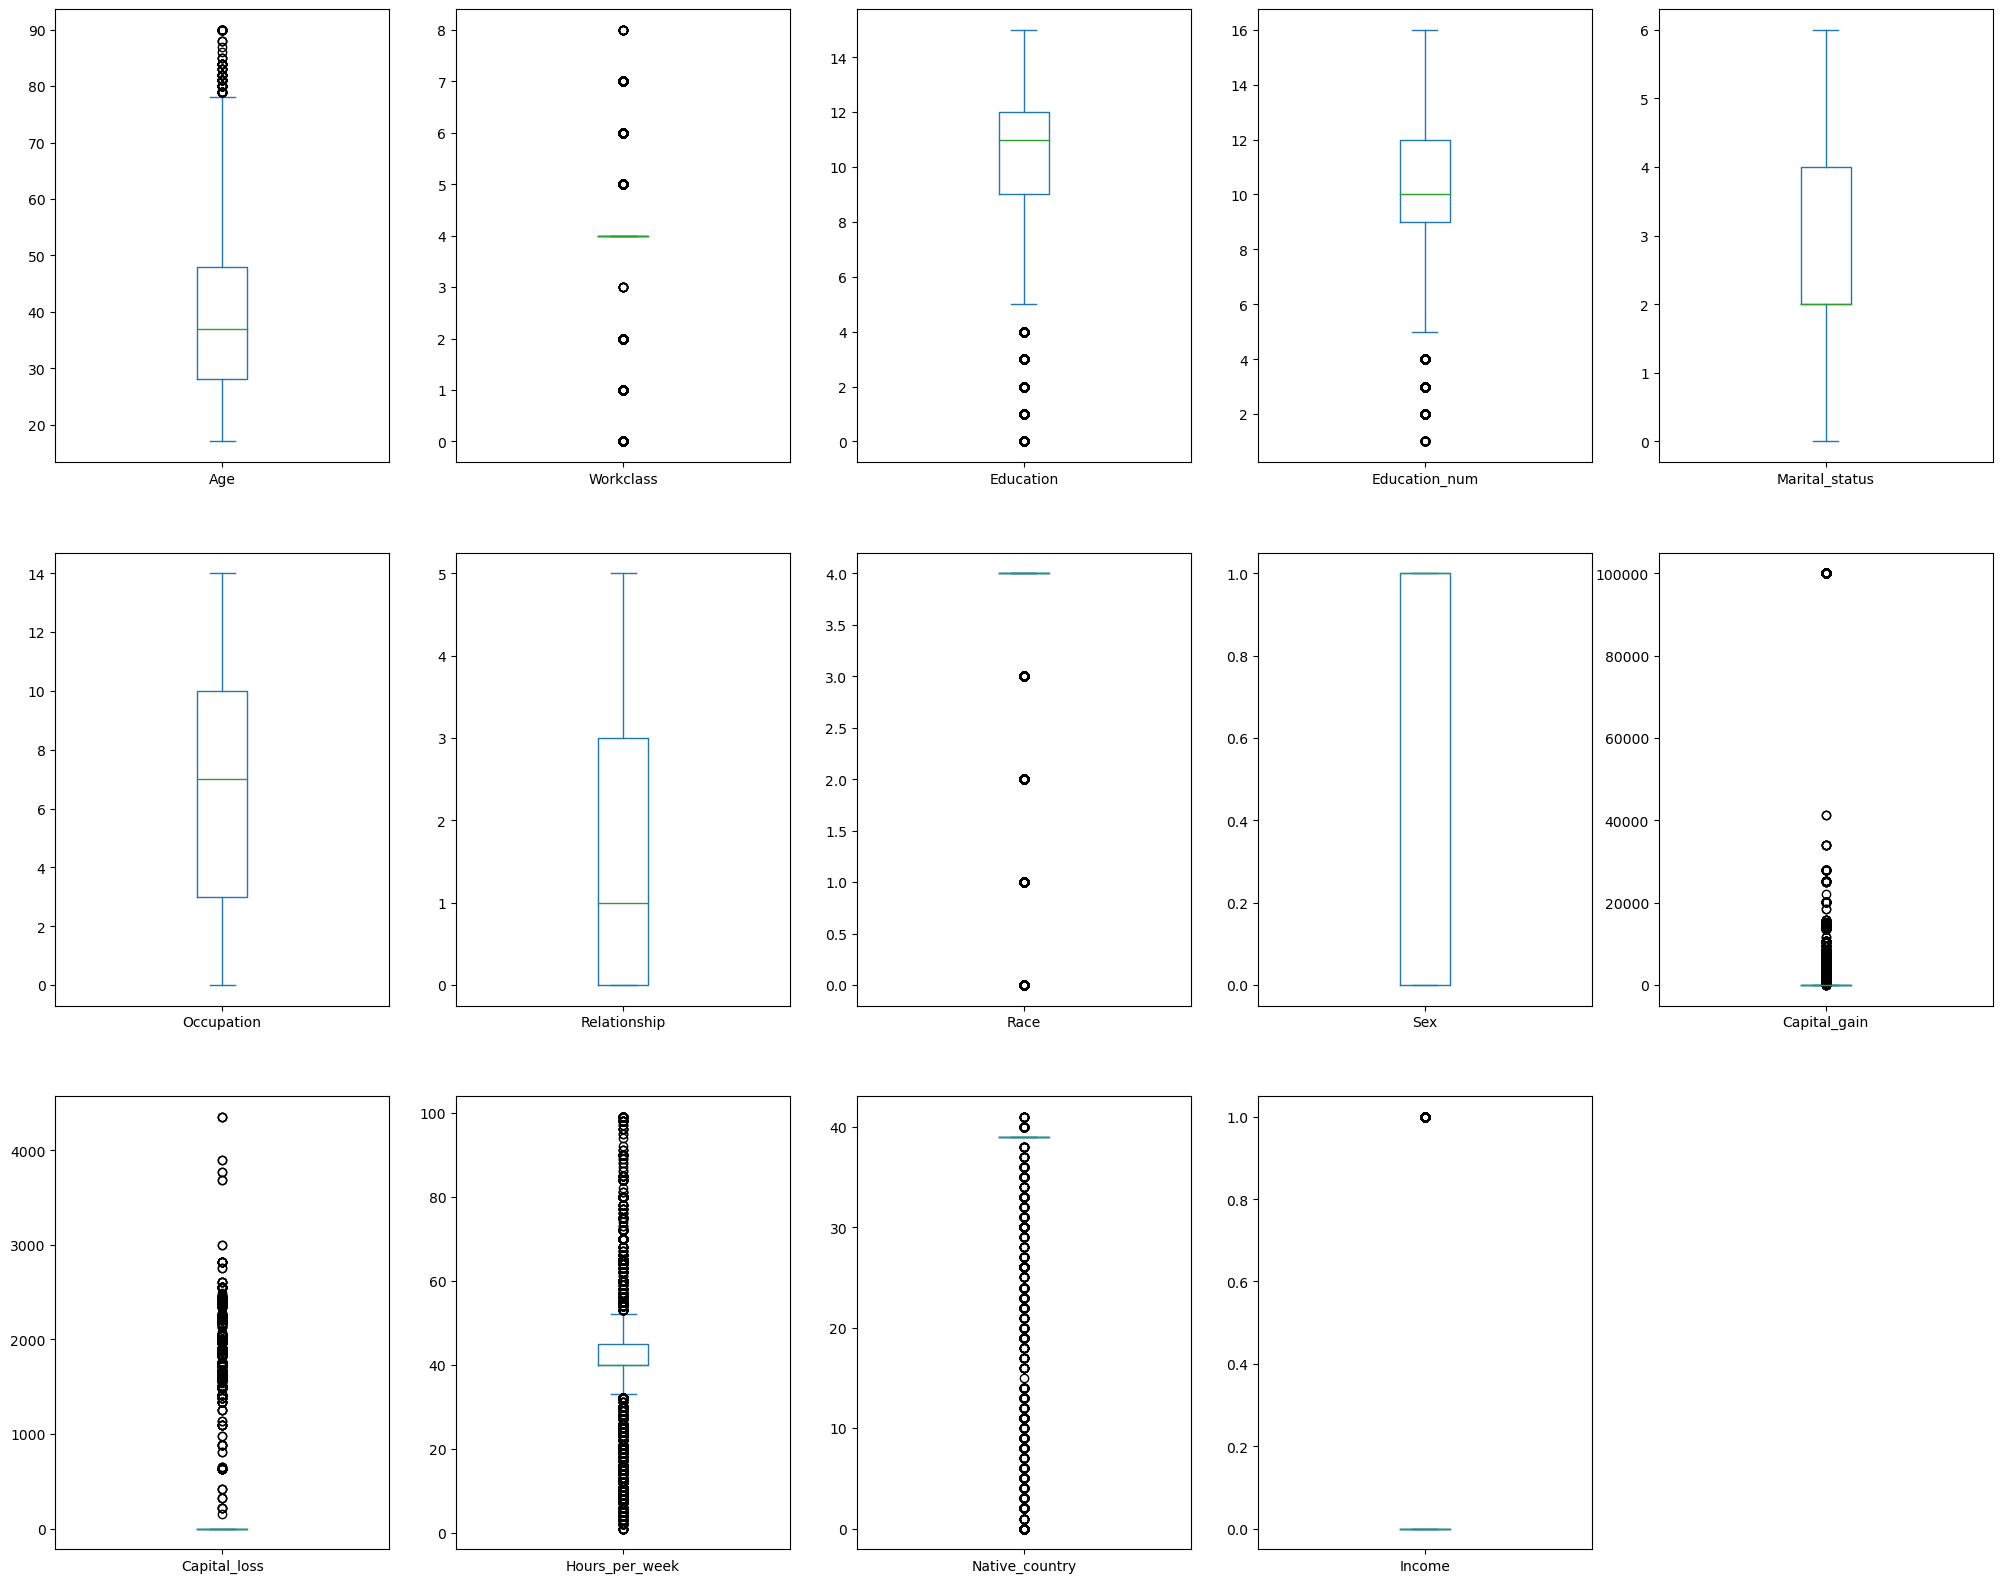

In [39]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(25,20))

                Outliers are present and need to treated

## Removal of Outliers

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [41]:
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([12, 11,  7, ...,  7,  7,  7], dtype=int64))

In [42]:
dfnew=df[(z<3).all(axis=1)]

In [43]:
dfnew.shape

(27721, 14)

                    Percentage Loss of Data = 14%

### Balancing the Data

In [44]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [45]:
x=dfnew.drop(['Income'],axis=1)
y=dfnew['Income']
trainx,trainy=smt.fit_resample(x,y)

In [46]:
trainx.shape

(43028, 13)

In [47]:
trainy.shape

(43028,)

                        Data Balancing Sucessfull

### Handling Skewness

In [48]:
df.skew()

Age                0.558738
Workclass         -0.752280
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [49]:
trainx.skew().sort_values()

Native_country    -6.038909
Race              -2.872685
Sex               -0.977790
Education         -0.952385
Workclass         -0.780981
Hours_per_week    -0.369080
Education_num     -0.223739
Occupation         0.104319
Age                0.291659
Marital_status     0.320544
Relationship       1.170383
Capital_gain       3.300612
Capital_loss      35.821069
dtype: float64

In [50]:
from sklearn.preprocessing import power_transform

In [51]:
dft=trainx

In [52]:
trainx=power_transform(trainx,method='yeo-johnson')

In [53]:
dfx=pd.DataFrame(data=trainx,columns=dft.columns)

In [54]:
dfx.skew().sort_values()

Race              -2.698936
Sex               -0.977790
Education         -0.204136
Occupation        -0.174504
Age               -0.034873
Education_num     -0.006453
Marital_status     0.003138
Workclass          0.105294
Hours_per_week     0.130695
Relationship       0.402054
Native_country     1.801932
Capital_gain       2.226273
Capital_loss      29.583519
dtype: float64

                        Skewness has been Managed

### Scaling the Data

In [55]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [56]:
df1=ss.fit_transform(dfx)

In [57]:
df1.mean()

-5.665399635103523e-18

                                                                                                      The mean value of approximately -8.89e-19 indicates that the data has been successfully standardized using StandardScaler, and the mean is very close to zero, which is expected after standardization. In practice, a mean value close to zero is generally considered acceptable for standardized data

## Model Classification and Building 

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [59]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(df1,trainy,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

### K Neighbors Classifer

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier()

In [62]:
model_selection(knn)

at random state 0,  accuracy score is 0.8496397861956775
at random state 0, confusion matrix is [[5255 1230]
 [ 711 5713]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.88      0.81      0.84      6485
           1       0.82      0.89      0.85      6424

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 1,  accuracy score is 0.8453017274769541
at random state 1, confusion matrix is [[5190 1278]
 [ 719 5722]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.88      0.80      0.84      6468
           1       0.82      0.89      0.85      6441

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at rando

at random state 17,  accuracy score is 0.8497172515299404
at random state 17, confusion matrix is [[5136 1227]
 [ 713 5833]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.88      0.81      0.84      6363
           1       0.83      0.89      0.86      6546

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 18,  accuracy score is 0.8426679061120149
at random state 18, confusion matrix is [[5100 1331]
 [ 700 5778]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.88      0.79      0.83      6431
           1       0.81      0.89      0.85      6478

    accuracy                           0.84     12909
   macro avg       0.85      0.84      0.84     12909
weighted avg       0.85      0.84      0.84     12909



at

at random state 34,  accuracy score is 0.8508017662096212
at random state 34, confusion matrix is [[5289 1278]
 [ 648 5694]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.89      0.81      0.85      6567
           1       0.82      0.90      0.86      6342

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 35,  accuracy score is 0.8478580835076304
at random state 35, confusion matrix is [[5198 1241]
 [ 723 5747]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.88      0.81      0.84      6439
           1       0.82      0.89      0.85      6470

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at

at random state 51,  accuracy score is 0.8502595088697807
at random state 51, confusion matrix is [[5230 1224]
 [ 709 5746]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.88      0.81      0.84      6454
           1       0.82      0.89      0.86      6455

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 52,  accuracy score is 0.8473158261677899
at random state 52, confusion matrix is [[5161 1290]
 [ 681 5777]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.88      0.80      0.84      6451
           1       0.82      0.89      0.85      6458

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at

at random state 68,  accuracy score is 0.848245410178945
at random state 68, confusion matrix is [[5190 1206]
 [ 753 5760]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.87      0.81      0.84      6396
           1       0.83      0.88      0.85      6513

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 69,  accuracy score is 0.8450693314741653
at random state 69, confusion matrix is [[5193 1284]
 [ 716 5716]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.88      0.80      0.84      6477
           1       0.82      0.89      0.85      6432

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.84     12909
weighted avg       0.85      0.85      0.84     12909



at 

at random state 85,  accuracy score is 0.8520412115578279
at random state 85, confusion matrix is [[5209 1240]
 [ 670 5790]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.89      0.81      0.85      6449
           1       0.82      0.90      0.86      6460

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 86,  accuracy score is 0.852815864900457
at random state 86, confusion matrix is [[5146 1246]
 [ 654 5863]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.89      0.81      0.84      6392
           1       0.82      0.90      0.86      6517

    accuracy                           0.85     12909
   macro avg       0.86      0.85      0.85     12909
weighted avg       0.86      0.85      0.85     12909



at 

                                    *****************CV Score******************

In [63]:
score=cross_val_score(knn,df1,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81512898 0.83581222 0.85672786 0.86647298 0.85996514]
0.8468214370931297
0.01888222406798474


### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.8617243783406925
at random state 0, confusion matrix is [[5519  966]
 [ 819 5605]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.87      0.85      0.86      6485
           1       0.85      0.87      0.86      6424

    accuracy                           0.86     12909
   macro avg       0.86      0.86      0.86     12909
weighted avg       0.86      0.86      0.86     12909



at random state 1,  accuracy score is 0.8488651328530482
at random state 1, confusion matrix is [[5357 1111]
 [ 840 5601]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.86      0.83      0.85      6468
           1       0.83      0.87      0.85      6441

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at rando

at random state 18,  accuracy score is 0.8497947168642033
at random state 18, confusion matrix is [[5349 1082]
 [ 857 5621]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.86      0.83      0.85      6431
           1       0.84      0.87      0.85      6478

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 19,  accuracy score is 0.8552172902626075
at random state 19, confusion matrix is [[5553  986]
 [ 883 5487]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.86      0.85      0.86      6539
           1       0.85      0.86      0.85      6370

    accuracy                           0.86     12909
   macro avg       0.86      0.86      0.86     12909
weighted avg       0.86      0.86      0.86     12909



at

at random state 36,  accuracy score is 0.8510341622124099
at random state 36, confusion matrix is [[5371 1113]
 [ 810 5615]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.87      0.83      0.85      6484
           1       0.83      0.87      0.85      6425

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 37,  accuracy score is 0.8563792702765513
at random state 37, confusion matrix is [[5460 1042]
 [ 812 5595]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.87      0.84      0.85      6502
           1       0.84      0.87      0.86      6407

    accuracy                           0.86     12909
   macro avg       0.86      0.86      0.86     12909
weighted avg       0.86      0.86      0.86     12909



at

at random state 54,  accuracy score is 0.8537454489116121
at random state 54, confusion matrix is [[5430 1079]
 [ 809 5591]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.87      0.83      0.85      6509
           1       0.84      0.87      0.86      6400

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 55,  accuracy score is 0.8550623595940816
at random state 55, confusion matrix is [[5422 1046]
 [ 825 5616]]
at random state 55, classification report is               precision    recall  f1-score   support

           0       0.87      0.84      0.85      6468
           1       0.84      0.87      0.86      6441

    accuracy                           0.86     12909
   macro avg       0.86      0.86      0.86     12909
weighted avg       0.86      0.86      0.86     12909



at

at random state 72,  accuracy score is 0.8595553489813309
at random state 72, confusion matrix is [[5431  986]
 [ 827 5665]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.87      0.85      0.86      6417
           1       0.85      0.87      0.86      6492

    accuracy                           0.86     12909
   macro avg       0.86      0.86      0.86     12909
weighted avg       0.86      0.86      0.86     12909



at random state 73,  accuracy score is 0.8570764582849175
at random state 73, confusion matrix is [[5384  992]
 [ 853 5680]]
at random state 73, classification report is               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6376
           1       0.85      0.87      0.86      6533

    accuracy                           0.86     12909
   macro avg       0.86      0.86      0.86     12909
weighted avg       0.86      0.86      0.86     12909



at

at random state 90,  accuracy score is 0.852815864900457
at random state 90, confusion matrix is [[5391 1023]
 [ 877 5618]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6414
           1       0.85      0.86      0.86      6495

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 91,  accuracy score is 0.8570764582849175
at random state 91, confusion matrix is [[5403 1017]
 [ 828 5661]]
at random state 91, classification report is               precision    recall  f1-score   support

           0       0.87      0.84      0.85      6420
           1       0.85      0.87      0.86      6489

    accuracy                           0.86     12909
   macro avg       0.86      0.86      0.86     12909
weighted avg       0.86      0.86      0.86     12909



at 

            *******************CV Score*******************

In [65]:
score=cross_val_score(dtc,df1,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81838252 0.848594   0.8777597  0.8848344  0.88099942]
0.8621140096169544
0.025349145409250793


### Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.8863583546363003
at random state 0, confusion matrix is [[5632  853]
 [ 614 5810]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.90      0.87      0.88      6485
           1       0.87      0.90      0.89      6424

    accuracy                           0.89     12909
   macro avg       0.89      0.89      0.89     12909
weighted avg       0.89      0.89      0.89     12909



at random state 1,  accuracy score is 0.883801998605624
at random state 1, confusion matrix is [[5547  921]
 [ 579 5862]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.91      0.86      0.88      6468
           1       0.86      0.91      0.89      6441

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at random

at random state 17,  accuracy score is 0.8871330079789295
at random state 17, confusion matrix is [[5529  834]
 [ 623 5923]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.90      0.87      0.88      6363
           1       0.88      0.90      0.89      6546

    accuracy                           0.89     12909
   macro avg       0.89      0.89      0.89     12909
weighted avg       0.89      0.89      0.89     12909



at random state 18,  accuracy score is 0.8826400185916802
at random state 18, confusion matrix is [[5484  947]
 [ 568 5910]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.91      0.85      0.88      6431
           1       0.86      0.91      0.89      6478

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at

at random state 34,  accuracy score is 0.8827949492602061
at random state 34, confusion matrix is [[5661  906]
 [ 607 5735]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6567
           1       0.86      0.90      0.88      6342

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at random state 35,  accuracy score is 0.8817104345805252
at random state 35, confusion matrix is [[5550  889]
 [ 638 5832]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6439
           1       0.87      0.90      0.88      6470

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at

at random state 51,  accuracy score is 0.8840343946084127
at random state 51, confusion matrix is [[5583  871]
 [ 626 5829]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.90      0.87      0.88      6454
           1       0.87      0.90      0.89      6455

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at random state 52,  accuracy score is 0.8820202959175769
at random state 52, confusion matrix is [[5533  918]
 [ 605 5853]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6451
           1       0.86      0.91      0.88      6458

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at

at random state 68,  accuracy score is 0.8877527306530327
at random state 68, confusion matrix is [[5551  845]
 [ 604 5909]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.90      0.87      0.88      6396
           1       0.87      0.91      0.89      6513

    accuracy                           0.89     12909
   macro avg       0.89      0.89      0.89     12909
weighted avg       0.89      0.89      0.89     12909



at random state 69,  accuracy score is 0.8826400185916802
at random state 69, confusion matrix is [[5603  874]
 [ 641 5791]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.90      0.87      0.88      6477
           1       0.87      0.90      0.88      6432

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at

at random state 85,  accuracy score is 0.8872879386474553
at random state 85, confusion matrix is [[5573  876]
 [ 579 5881]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.91      0.86      0.88      6449
           1       0.87      0.91      0.89      6460

    accuracy                           0.89     12909
   macro avg       0.89      0.89      0.89     12909
weighted avg       0.89      0.89      0.89     12909



at random state 86,  accuracy score is 0.8836470679370981
at random state 86, confusion matrix is [[5529  863]
 [ 639 5878]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6392
           1       0.87      0.90      0.89      6517

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at

                *******************CV Score********************

In [68]:
score=cross_val_score(rf,df1,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.84046014 0.87752731 0.90262607 0.90935503 0.9080767 ]
0.8876090502376422
0.026237317216494662


### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_selection(lr)

at random state 0,  accuracy score is 0.7975056162367341
at random state 0, confusion matrix is [[5007 1478]
 [1136 5288]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.82      0.77      0.79      6485
           1       0.78      0.82      0.80      6424

    accuracy                           0.80     12909
   macro avg       0.80      0.80      0.80     12909
weighted avg       0.80      0.80      0.80     12909



at random state 1,  accuracy score is 0.7842590440777752
at random state 1, confusion matrix is [[4882 1586]
 [1199 5242]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.80      0.75      0.78      6468
           1       0.77      0.81      0.79      6441

    accuracy                           0.78     12909
   macro avg       0.79      0.78      0.78     12909
weighted avg       0.79      0.78      0.78     12909



at rando

at random state 17, classification report is               precision    recall  f1-score   support

           0       0.80      0.76      0.78      6363
           1       0.78      0.81      0.80      6546

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random state 18,  accuracy score is 0.7832519947323573
at random state 18, confusion matrix is [[4835 1596]
 [1202 5276]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.80      0.75      0.78      6431
           1       0.77      0.81      0.79      6478

    accuracy                           0.78     12909
   macro avg       0.78      0.78      0.78     12909
weighted avg       0.78      0.78      0.78     12909



at random state 19,  accuracy score is 0.7913858548299636
at random state 19, confusion matrix is [[4955 1584]
 [1109 5261]]
at

at random state 35,  accuracy score is 0.7887520334650244
at random state 35, confusion matrix is [[4924 1515]
 [1212 5258]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.80      0.76      0.78      6439
           1       0.78      0.81      0.79      6470

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random state 36,  accuracy score is 0.7846463707490898
at random state 36, confusion matrix is [[4877 1607]
 [1173 5252]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.81      0.75      0.78      6484
           1       0.77      0.82      0.79      6425

    accuracy                           0.78     12909
   macro avg       0.79      0.78      0.78     12909
weighted avg       0.79      0.78      0.78     12909



at

at random state 52, confusion matrix is [[4886 1565]
 [1187 5271]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.80      0.76      0.78      6451
           1       0.77      0.82      0.79      6458

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random state 53,  accuracy score is 0.7820125493841505
at random state 53, confusion matrix is [[4861 1667]
 [1147 5234]]
at random state 53, classification report is               precision    recall  f1-score   support

           0       0.81      0.74      0.78      6528
           1       0.76      0.82      0.79      6381

    accuracy                           0.78     12909
   macro avg       0.78      0.78      0.78     12909
weighted avg       0.78      0.78      0.78     12909



at random state 54,  accuracy score is 0.7879773801223953
at

at random state 71,  accuracy score is 0.7892168254706019
at random state 71, confusion matrix is [[4944 1585]
 [1136 5244]]
at random state 71, classification report is               precision    recall  f1-score   support

           0       0.81      0.76      0.78      6529
           1       0.77      0.82      0.79      6380

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random state 72,  accuracy score is 0.787280192114029
at random state 72, confusion matrix is [[4862 1555]
 [1191 5301]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.80      0.76      0.78      6417
           1       0.77      0.82      0.79      6492

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at 

at random state 88, classification report is               precision    recall  f1-score   support

           0       0.79      0.75      0.77      6346
           1       0.77      0.81      0.79      6563

    accuracy                           0.78     12909
   macro avg       0.78      0.78      0.78     12909
weighted avg       0.78      0.78      0.78     12909



at random state 89,  accuracy score is 0.7923929041753816
at random state 89, confusion matrix is [[4899 1492]
 [1188 5330]]
at random state 89, classification report is               precision    recall  f1-score   support

           0       0.80      0.77      0.79      6391
           1       0.78      0.82      0.80      6518

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random state 90,  accuracy score is 0.7896816174761794
at random state 90, confusion matrix is [[4886 1528]
 [1187 5308]]
at

            This best fit Model is Random Forest Classifier we will choose it

        ***************************CV Score**************************

In [70]:
score=cross_val_score(lr,df1,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.76888218 0.7848013  0.79107599 0.78640325 0.79941894]
0.7861163333069114
0.010003854026269876


### Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
dict={'max_features':['auto','sqrt','log2'],'max_depth':[20,21,22],'criterion':['gini','entropy'],
      'n_estimators':[100,200]}

In [73]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=5)

In [74]:
gd.fit(df1,trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 21, 22],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [75]:
gd.best_params_

{'criterion': 'gini',
 'max_depth': 22,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [76]:
gd.best_score_

0.8860517701594081

### Building the Final Model

In [77]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(df1,trainy,random_state=47,test_size=0.30)
rf=RandomForestClassifier(max_features='log2',max_depth=20,criterion="gini",n_estimators=100)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")

Accuracy score:-- 0.881942830583314
Confusion matrix:-- [[5422 1053]
 [ 471 5963]]
classification report:--               precision    recall  f1-score   support

           0       0.92      0.84      0.88      6475
           1       0.85      0.93      0.89      6434

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.89      0.88      0.88     12909





                                AUC-ROC Score

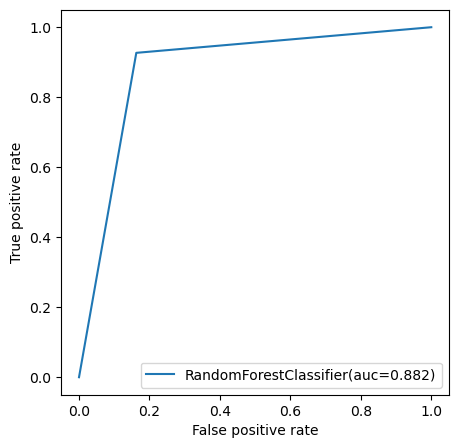

In [78]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='RandomForestClassifier(auc=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

                        AUC Score is 88%

### Prediction

In [79]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred})

In [80]:
dfpred.sample(25)

,Expected,Predicted
29363,1,1
27684,1,1
7068,0,1
25620,0,0
14146,0,0
10229,0,1
26403,0,1
21362,0,0
36201,1,1
12453,0,0


                            Saving the Model

In [82]:
import pickle
file_name='Census_Income_Prediction.pkl'
pickle.dump(rf,open(file_name,'wb'))

## Conclusion

        The Model is predicting with an accuracy of 88% for the Target Variable Income